In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the data from sheet1

credit = pd.read_csv(r"C:\Users\Tanuku Swetha\OneDrive\Desktop\AIML & DS\Datasets\credit_train.csv", header=0)
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [4]:
len(credit)

100514

In [5]:
credit['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [6]:
credit.nunique()

Loan ID                         81999
Customer ID                     81999
Loan Status                         2
Current Loan Amount             22004
Term                                2
Credit Score                      324
Annual Income                   36174
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    65765
Years of Credit History           506
Months since last delinquent      116
Number of Open Accounts            51
Number of Credit Problems          14
Current Credit Balance          32730
Maximum Open Credit             44596
Bankruptcies                        8
Tax Liens                          12
dtype: int64

In [7]:
credit.duplicated().any()

True

In [8]:
credit=credit.drop_duplicates()

In [9]:
len(credit)

89786

In [10]:
credit.duplicated().any()

False

In [11]:
credit.isnull().sum()

Loan ID                             1
Customer ID                         1
Loan Status                         1
Current Loan Amount                 1
Term                                1
Credit Score                    19155
Annual Income                   19155
Years in current job             3803
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    48338
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      191
Tax Liens                          10
dtype: int64

In [12]:
credit = credit.dropna()
credit

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,3b2a09bb-3467-4d2f-bd8f-260fdc5760be,da2f2054-0f33-4b84-9234-508e42f6f493,Fully Paid,179454.0,Short Term,708.0,1356068.0,4 years,Home Mortgage,Debt Consolidation,22318.54,22.7,21.0,25.0,0.0,387410.0,1705616.0,0.0,0.0
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in credit.columns:
    if credit[col].dtypes=='object':
        credit[col]=le.fit_transform(credit[col])

In [14]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31254 entries, 2 to 99997
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       31254 non-null  int32  
 1   Customer ID                   31254 non-null  int32  
 2   Loan Status                   31254 non-null  int32  
 3   Current Loan Amount           31254 non-null  float64
 4   Term                          31254 non-null  int32  
 5   Credit Score                  31254 non-null  float64
 6   Annual Income                 31254 non-null  float64
 7   Years in current job          31254 non-null  int32  
 8   Home Ownership                31254 non-null  int32  
 9   Purpose                       31254 non-null  int32  
 10  Monthly Debt                  31254 non-null  float64
 11  Years of Credit History       31254 non-null  float64
 12  Months since last delinquent  31254 non-null  float64
 13  N

In [15]:
credit = credit.rename(columns = {'Loan Status': 'Loan_Status'}, inplace = False)


In [16]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

Target_count = credit.Loan_Status.value_counts()
print('Class 0:', Target_count[0])
print('Class 1:', Target_count[1])
print('Proportion:', round(Target_count[1] / Target_count[0], 2), ': 1')
print('Total credit cards:', len(credit))

Class 0: 7451
Class 1: 23803
Proportion: 3.19 : 1
Total credit cards: 31254


In [17]:
credit['Loan_Status'].value_counts()

1    23803
0     7451
Name: Loan_Status, dtype: int64

In [18]:
variables=[]
for col_name in credit.columns: 
    variables.append(col_name)
    print(col_name)

Loan ID
Customer ID
Loan_Status
Current Loan Amount
Term
Credit Score
Annual Income
Years in current job
Home Ownership
Purpose
Monthly Debt
Years of Credit History
Months since last delinquent
Number of Open Accounts
Number of Credit Problems
Current Credit Balance
Maximum Open Credit
Bankruptcies
Tax Liens


Text(0.5, 0, 'Attributes')

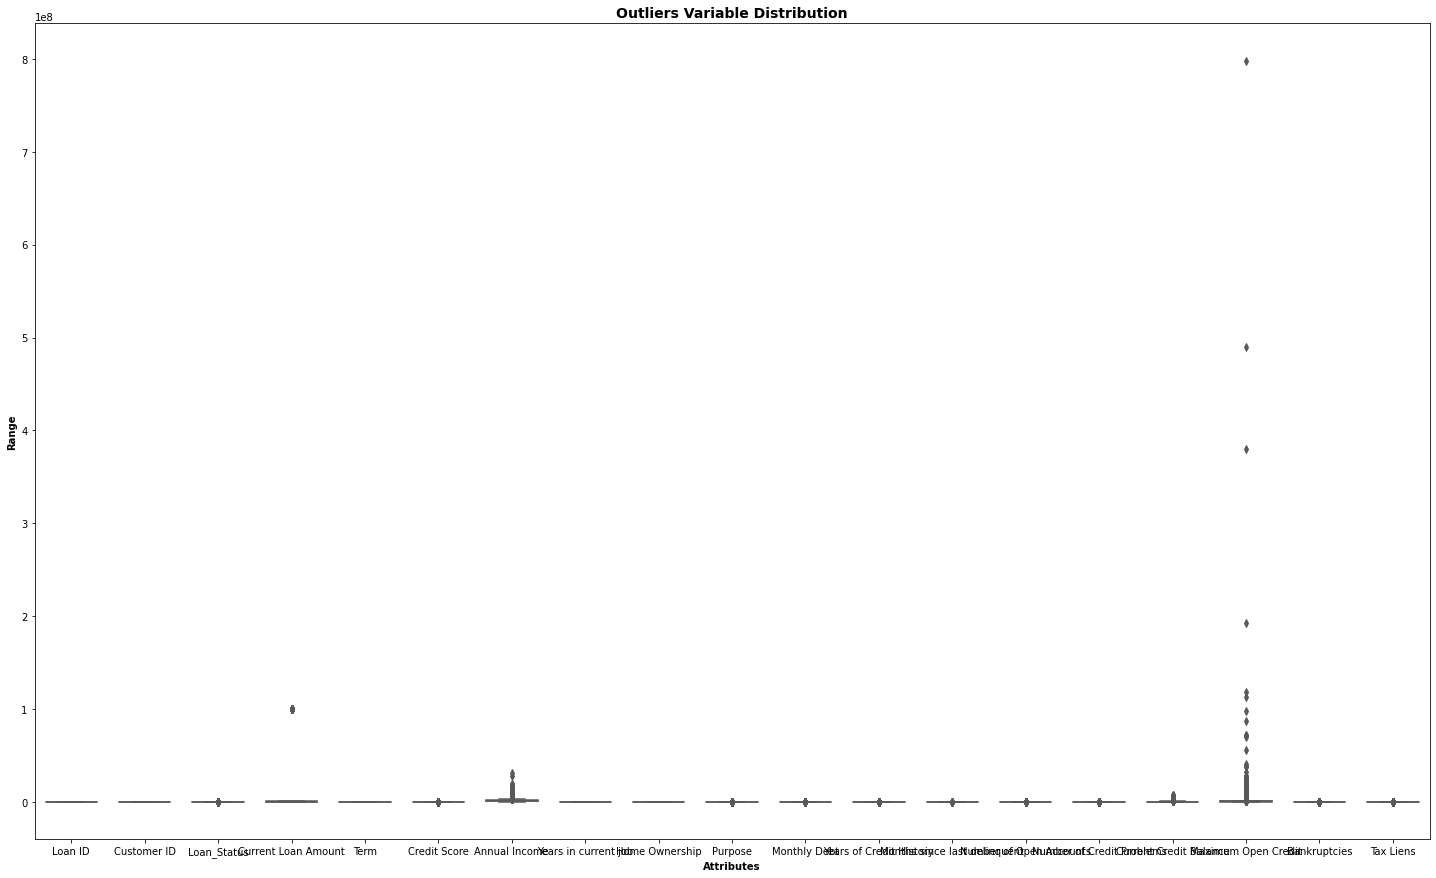

In [20]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [25,15]
sns.boxplot( data=credit[variables],orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [21]:
#identify the independent and target variables
IndepVar=[]
for col in credit.columns:
    if col!='Loan_Status':
        IndepVar.append(col)
TargetVar='Loan_Status'
x=credit[IndepVar]
y=credit[TargetVar]

In [22]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:
#Scaling the features by using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=mmscaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [52]:
# Load the Results dataset

EMResults = pd.read_csv(r"C:\Users\Tanuku Swetha\OneDrive\Desktop\AIML & DS\HTResults.csv", header=0)

EMResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[7181    1]
 [1660  535]]
Outcome values : 
 7181 1 1660 535
Classification report : 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90      7182
           0       1.00      0.24      0.39      2195

    accuracy                           0.82      9377
   macro avg       0.91      0.62      0.64      9377
weighted avg       0.86      0.82      0.78      9377

Accuracy : 82.3 %
Precision : 81.2 %
Recall : 100.0 %
F1 Score : 0.896
Specificity or True Negative Rate : 24.4 %
Balanced Accuracy : 62.2 %
roc_auc_score: 0.622


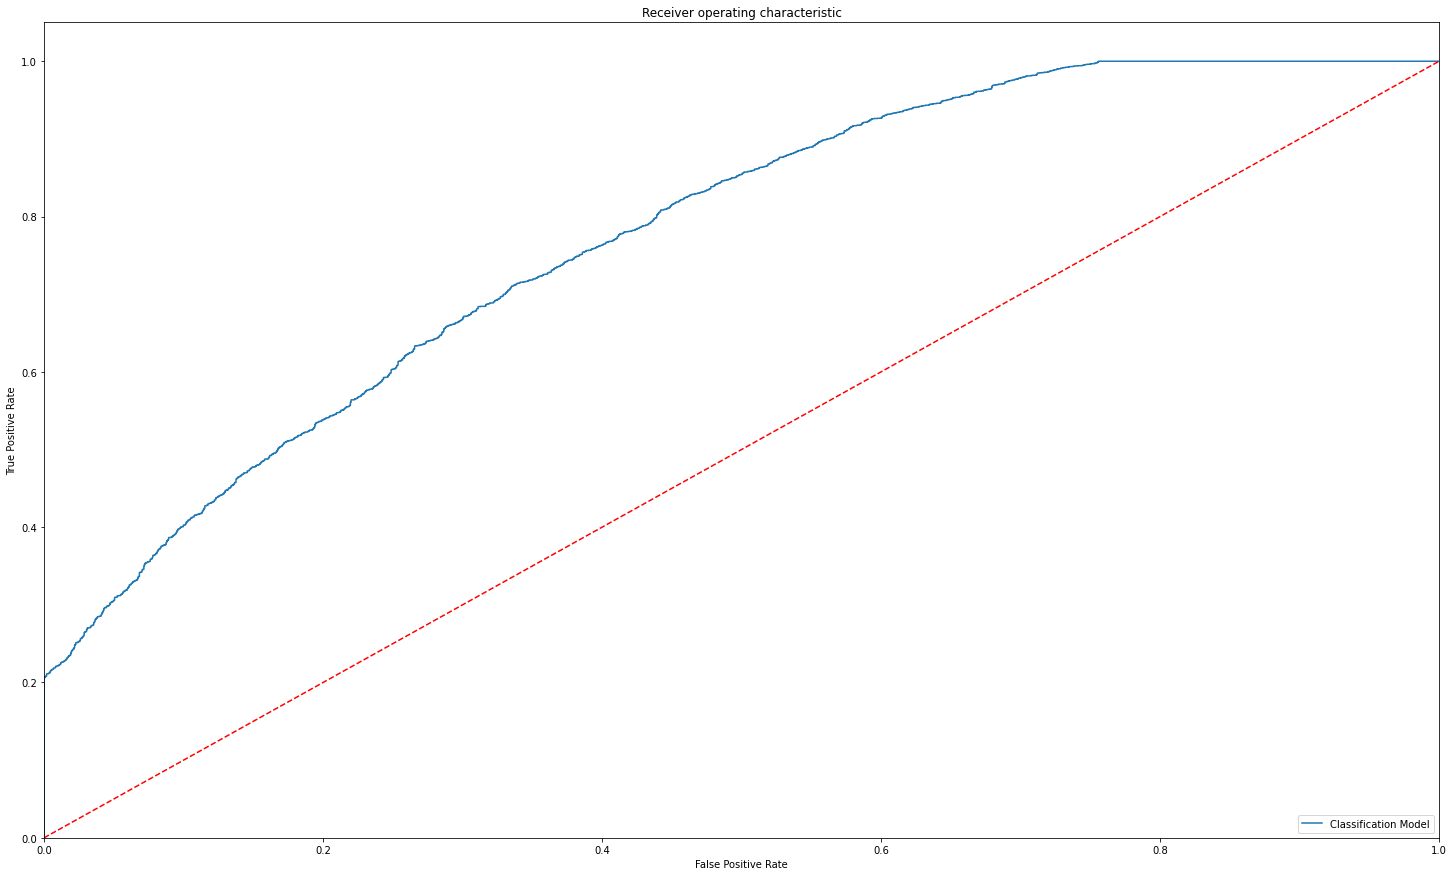

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[6007 1175]
 [1232  963]]
Outcome values : 
 6007 1175 1232 963
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.84      0.83      7182
           0       0.45      0.44      0.44      2195

    accuracy                           0.74      9377
   macro avg       0.64      0.64      0.64      9377
weighted avg       0.74      0.74      0.74      9377

Accuracy : 74.3 %
Precision : 83.0 %
Recall : 83.6 %
F1 Score : 0.833
Specificity or True Negative Rate : 43.9 %
Balanced Accuracy : 63.8 %
roc_auc_score: 0.638


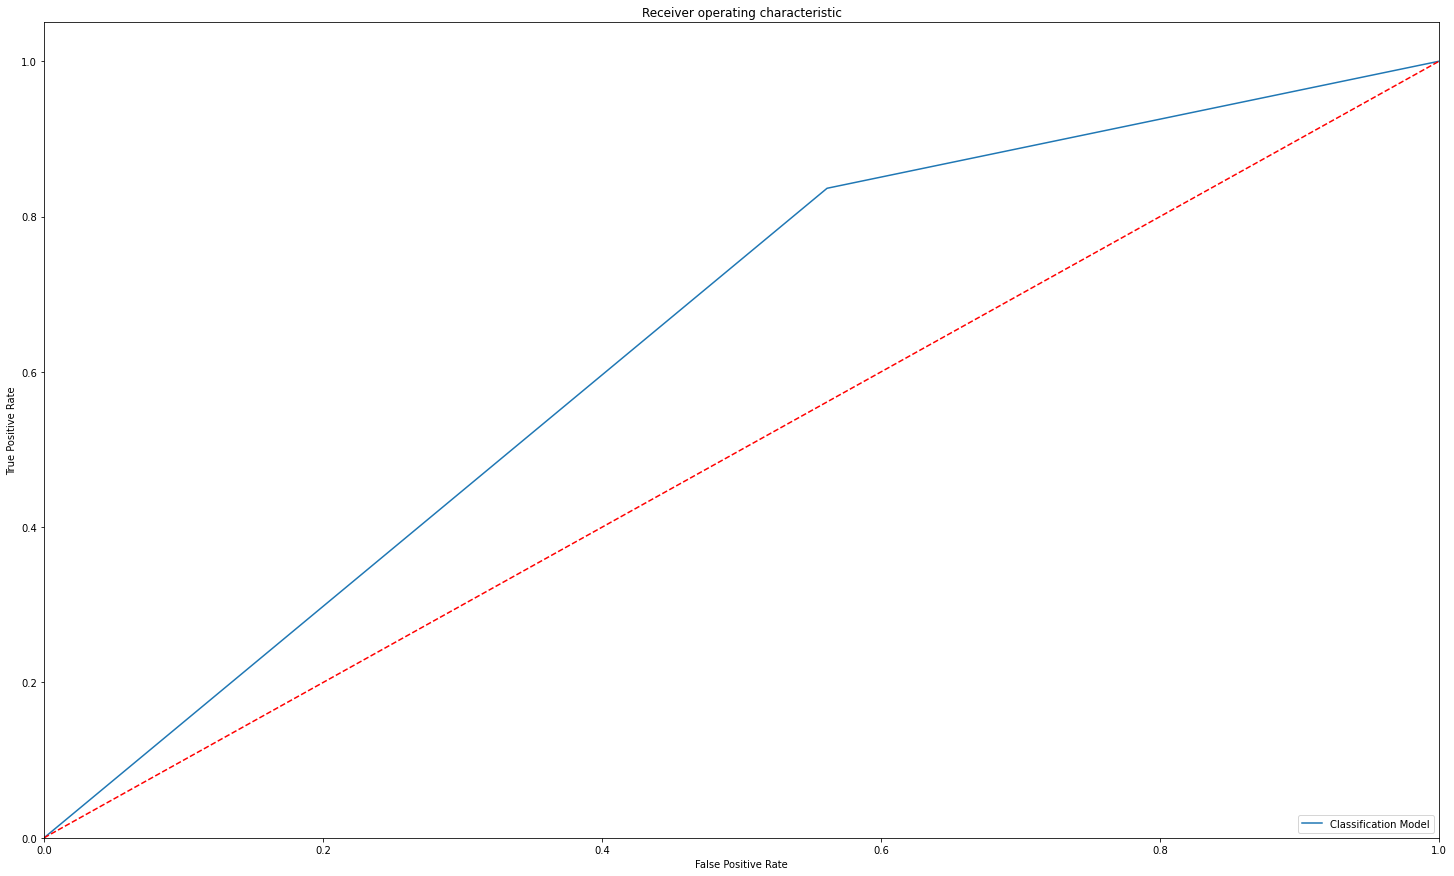

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[7174    8]
 [1652  543]]
Outcome values : 
 7174 8 1652 543
Classification report : 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90      7182
           0       0.99      0.25      0.40      2195

    accuracy                           0.82      9377
   macro avg       0.90      0.62      0.65      9377
weighted avg       0.85      0.82      0.78      9377

Accuracy : 82.3 %
Precision : 81.3 %
Recall : 99.9 %
F1 Score : 0.896
Specificity or True Negative Rate : 24.7 %
Balanced Accuracy : 62.3 %
roc_auc_score: 0.623


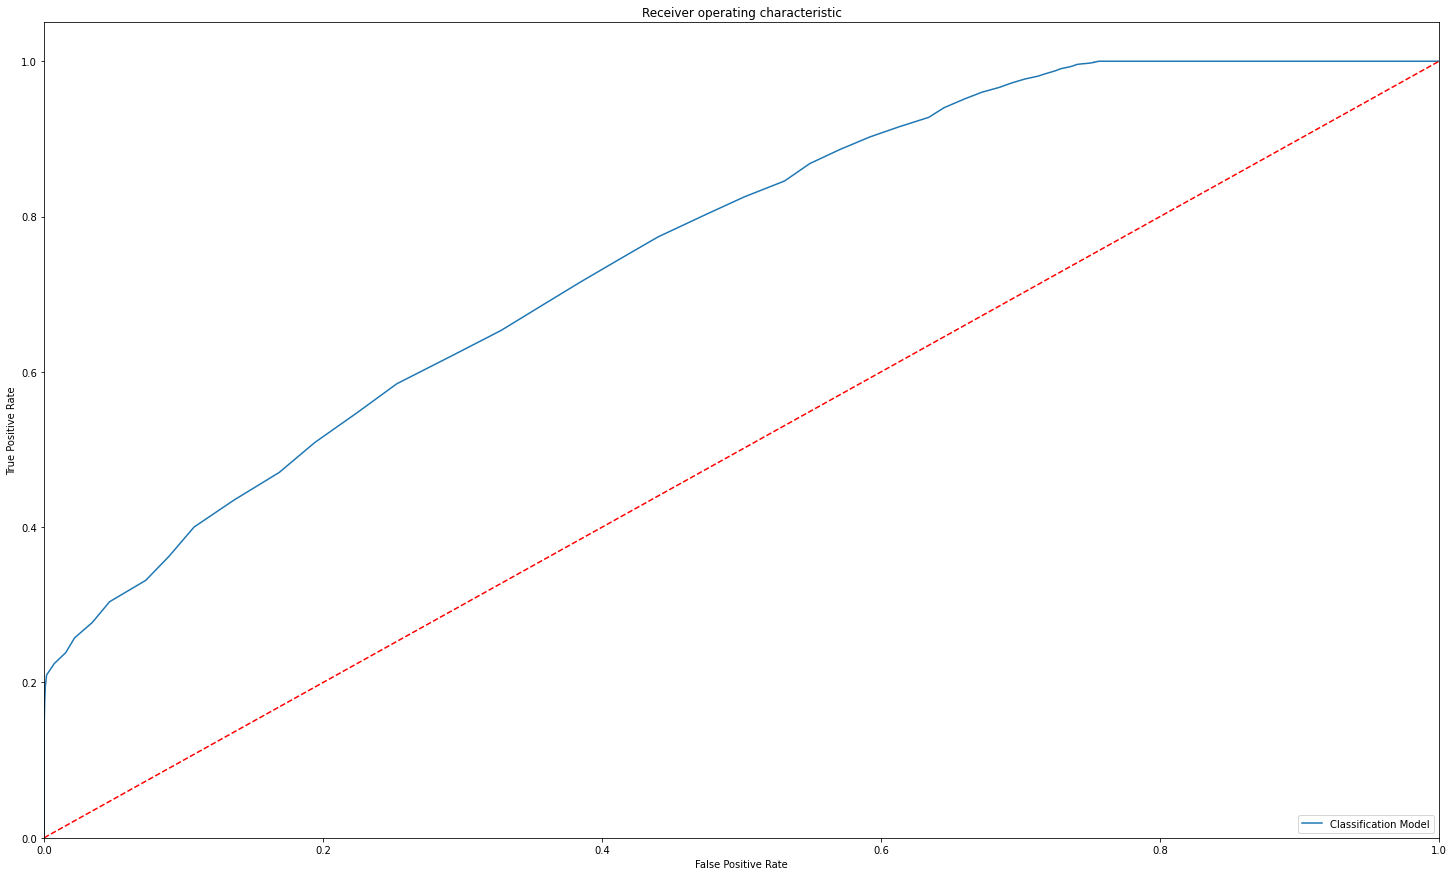

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[7163   19]
 [1645  550]]
Outcome values : 
 7163 19 1645 550
Classification report : 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90      7182
           0       0.97      0.25      0.40      2195

    accuracy                           0.82      9377
   macro avg       0.89      0.62      0.65      9377
weighted avg       0.85      0.82      0.78      9377

Accuracy : 82.3 %
Precision : 81.3 %
Recall : 99.7 %
F1 Score : 0.896
Specificity or True Negative Rate : 25.1 %
Balanced Accuracy : 62.4 %
roc_auc_score: 0.624


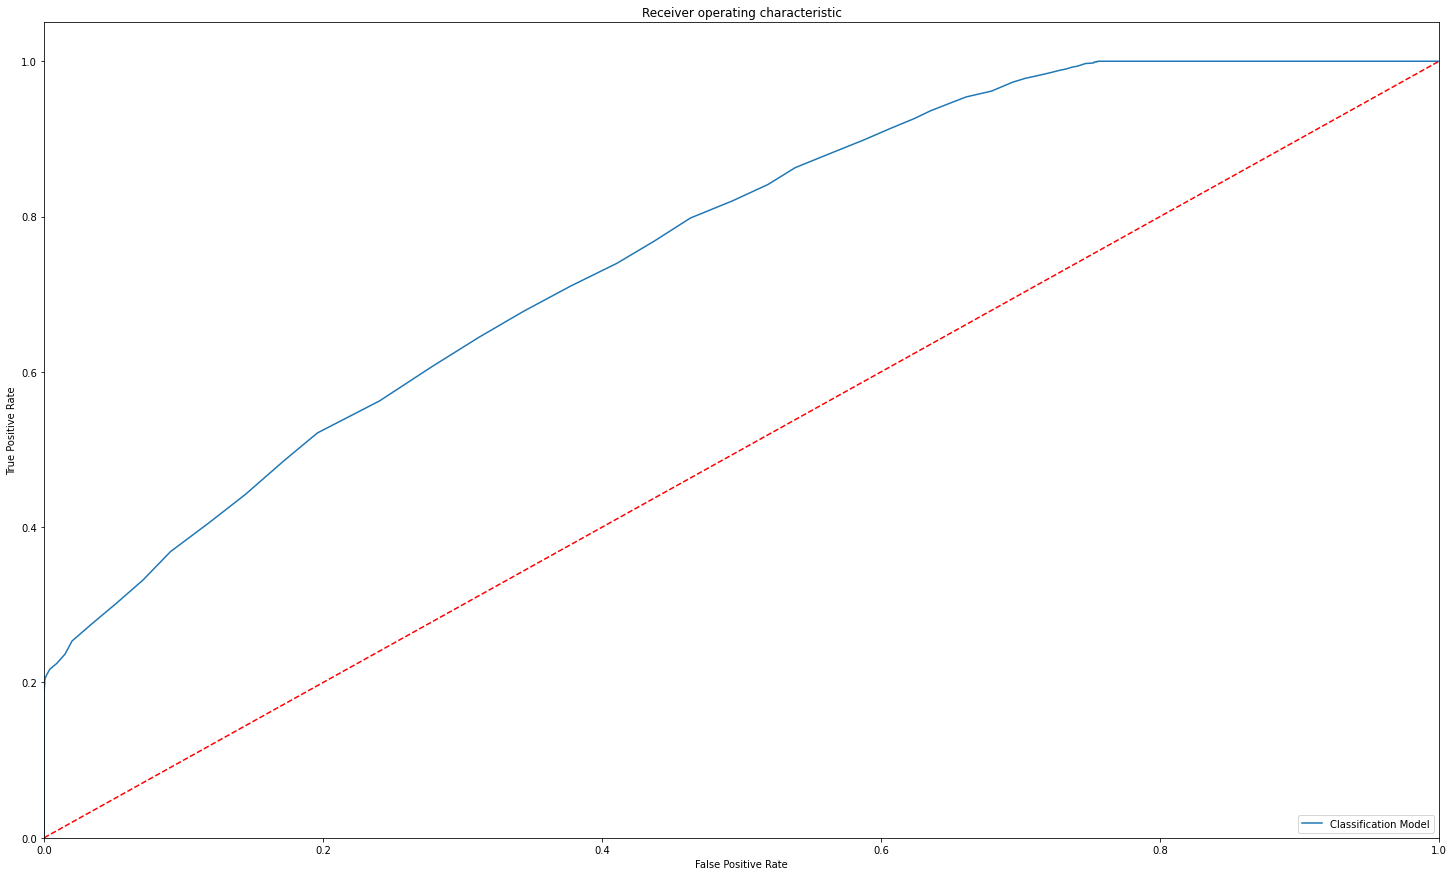

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[6739  443]
 [1481  714]]
Outcome values : 
 6739 443 1481 714
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.94      0.88      7182
           0       0.62      0.33      0.43      2195

    accuracy                           0.79      9377
   macro avg       0.72      0.63      0.65      9377
weighted avg       0.77      0.79      0.77      9377

Accuracy : 79.5 %
Precision : 82.0 %
Recall : 93.8 %
F1 Score : 0.875
Specificity or True Negative Rate : 32.5 %
Balanced Accuracy : 63.2 %
roc_auc_score: 0.632


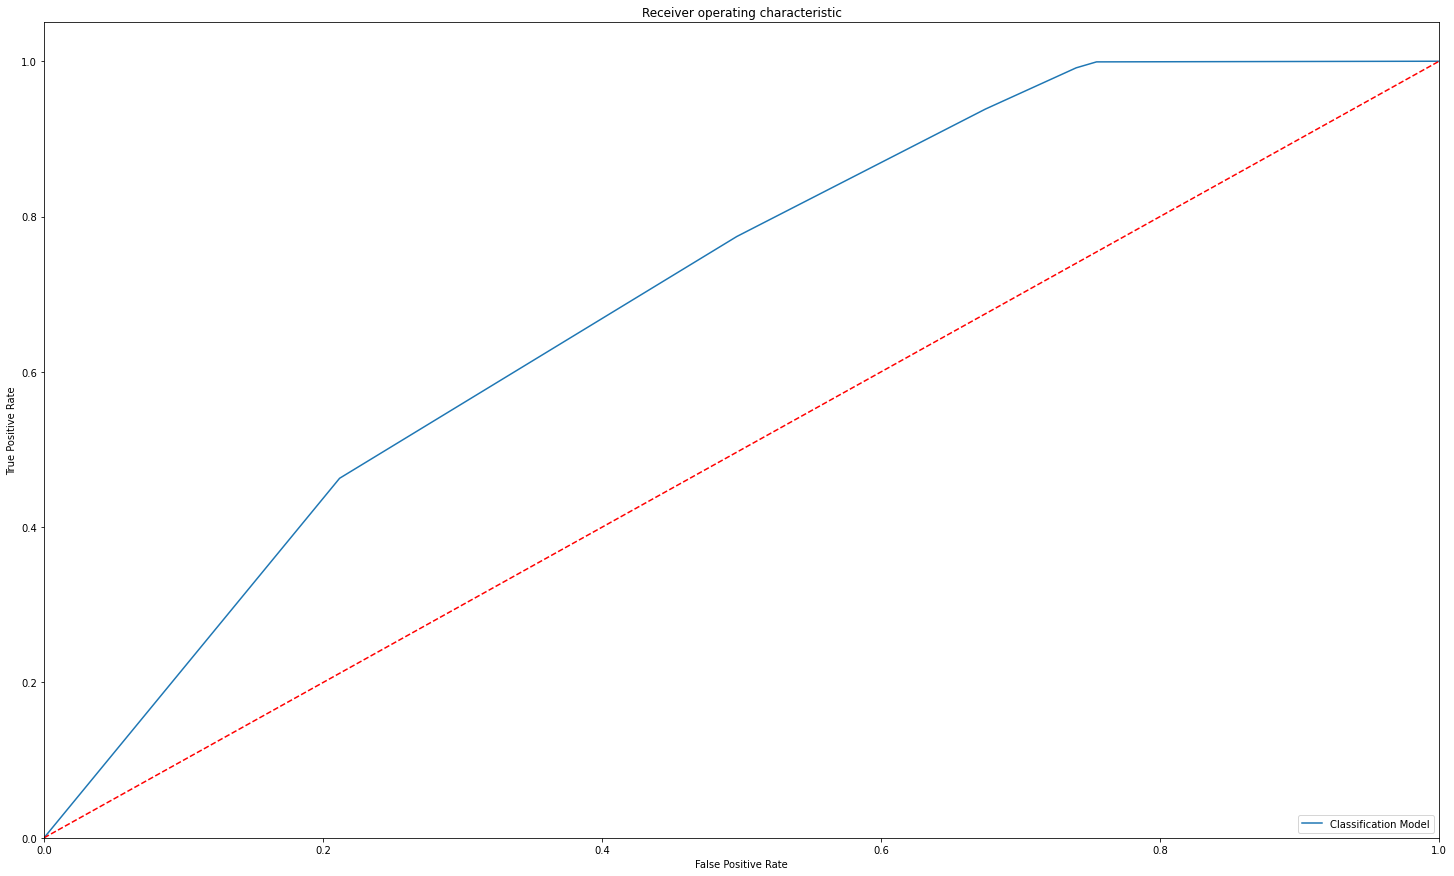

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[7182    0]
 [1660  535]]
Outcome values : 
 7182 0 1660 535
Classification report : 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90      7182
           0       1.00      0.24      0.39      2195

    accuracy                           0.82      9377
   macro avg       0.91      0.62      0.64      9377
weighted avg       0.86      0.82      0.78      9377

Accuracy : 82.3 %
Precision : 81.2 %
Recall : 100.0 %
F1 Score : 0.896
Specificity or True Negative Rate : 24.4 %
Balanced Accuracy : 62.2 %
roc_auc_score: 0.622


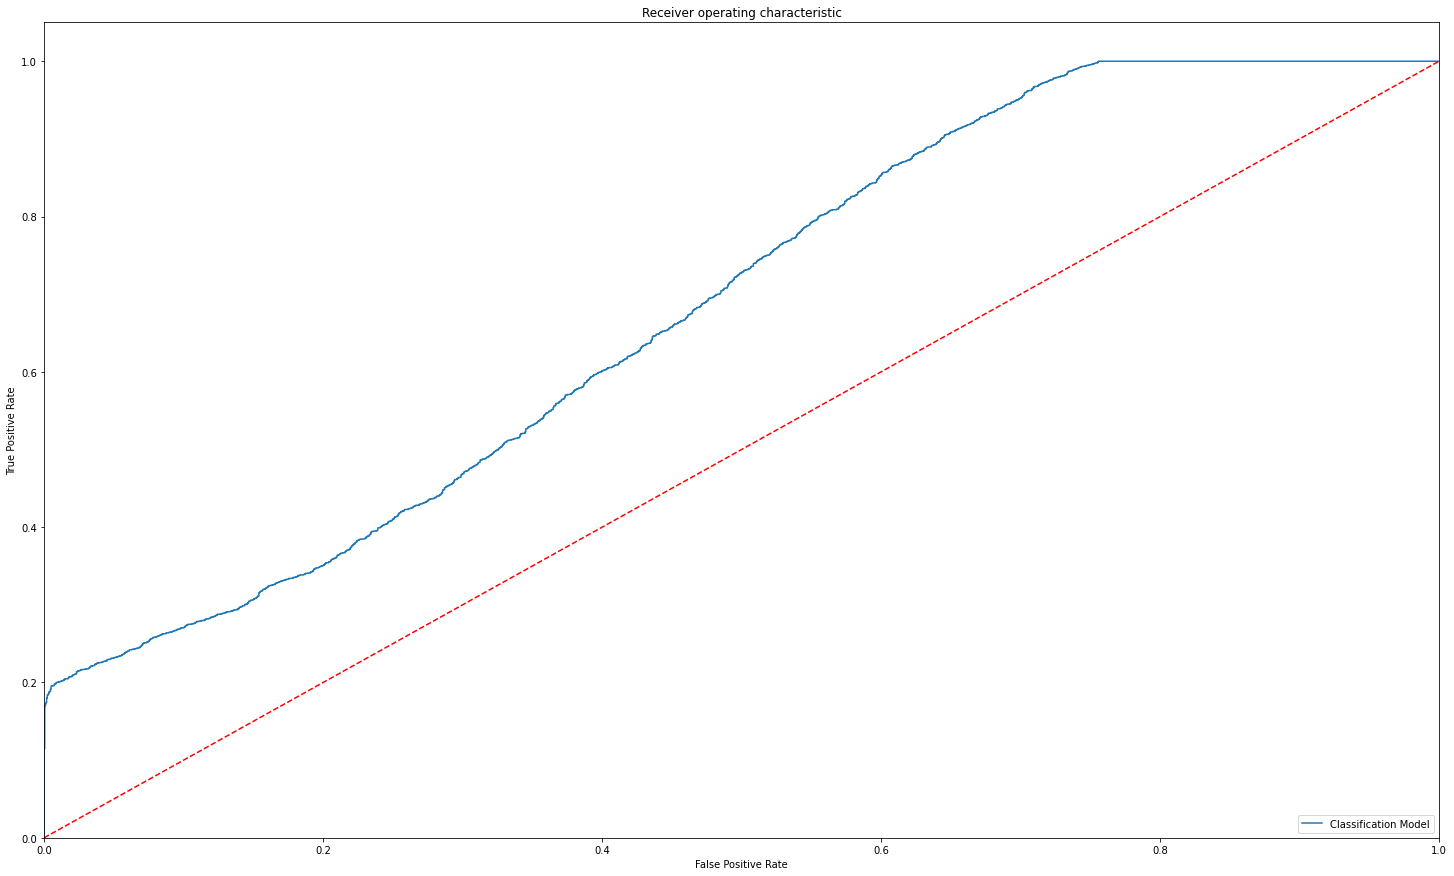

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[7146   36]
 [1630  565]]
Outcome values : 
 7146 36 1630 565
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.99      0.90      7182
           0       0.94      0.26      0.40      2195

    accuracy                           0.82      9377
   macro avg       0.88      0.63      0.65      9377
weighted avg       0.84      0.82      0.78      9377

Accuracy : 82.2 %
Precision : 81.4 %
Recall : 99.5 %
F1 Score : 0.896
Specificity or True Negative Rate : 25.7 %
Balanced Accuracy : 62.6 %
roc_auc_score: 0.626


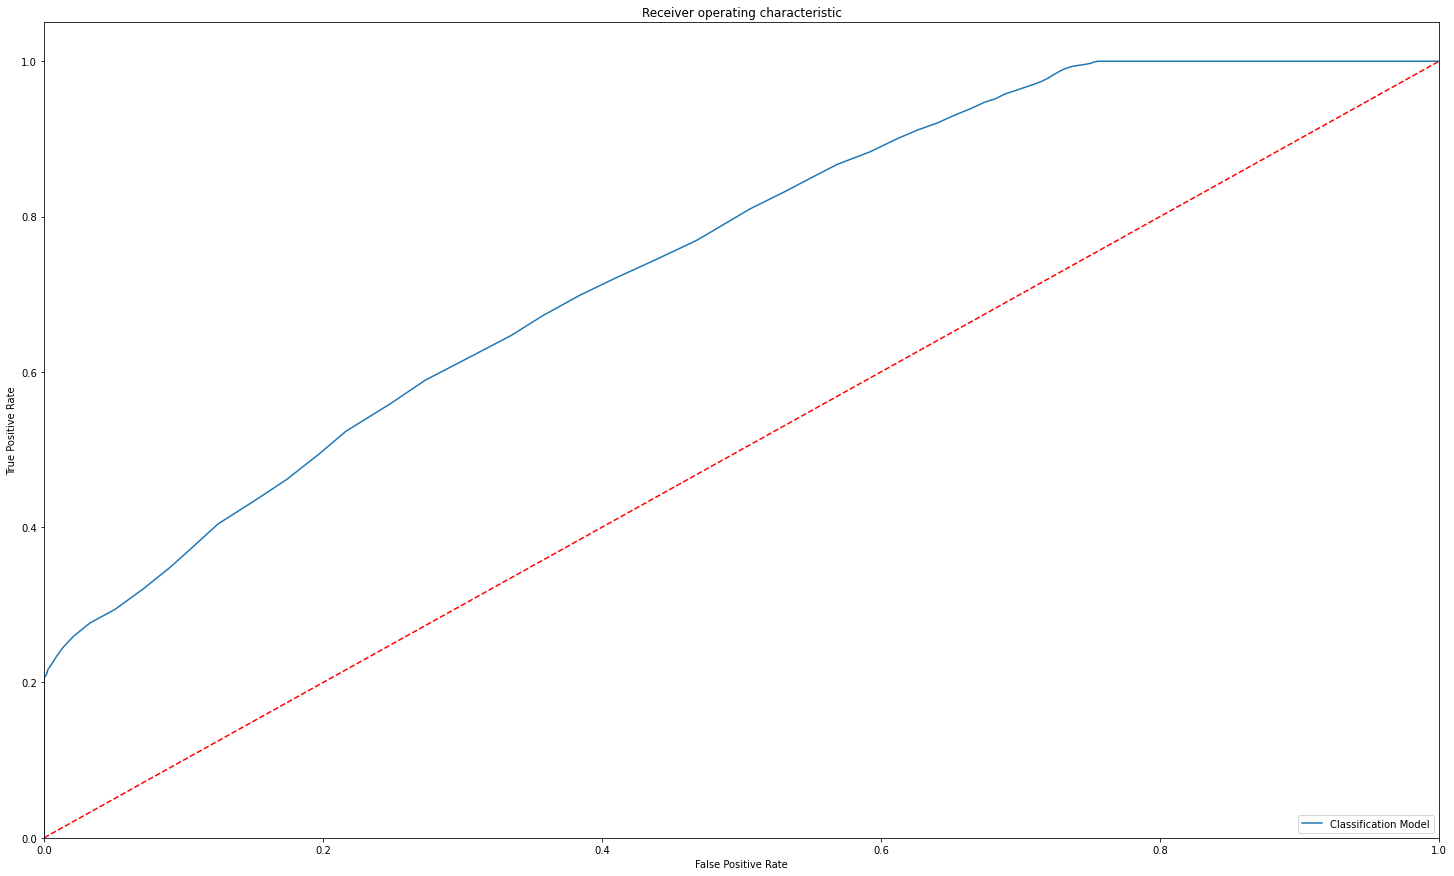

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[7179    3]
 [1656  539]]
Outcome values : 
 7179 3 1656 539
Classification report : 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90      7182
           0       0.99      0.25      0.39      2195

    accuracy                           0.82      9377
   macro avg       0.90      0.62      0.65      9377
weighted avg       0.86      0.82      0.78      9377

Accuracy : 82.3 %
Precision : 81.3 %
Recall : 100.0 %
F1 Score : 0.896
Specificity or True Negative Rate : 24.6 %
Balanced Accuracy : 62.3 %
roc_auc_score: 0.623


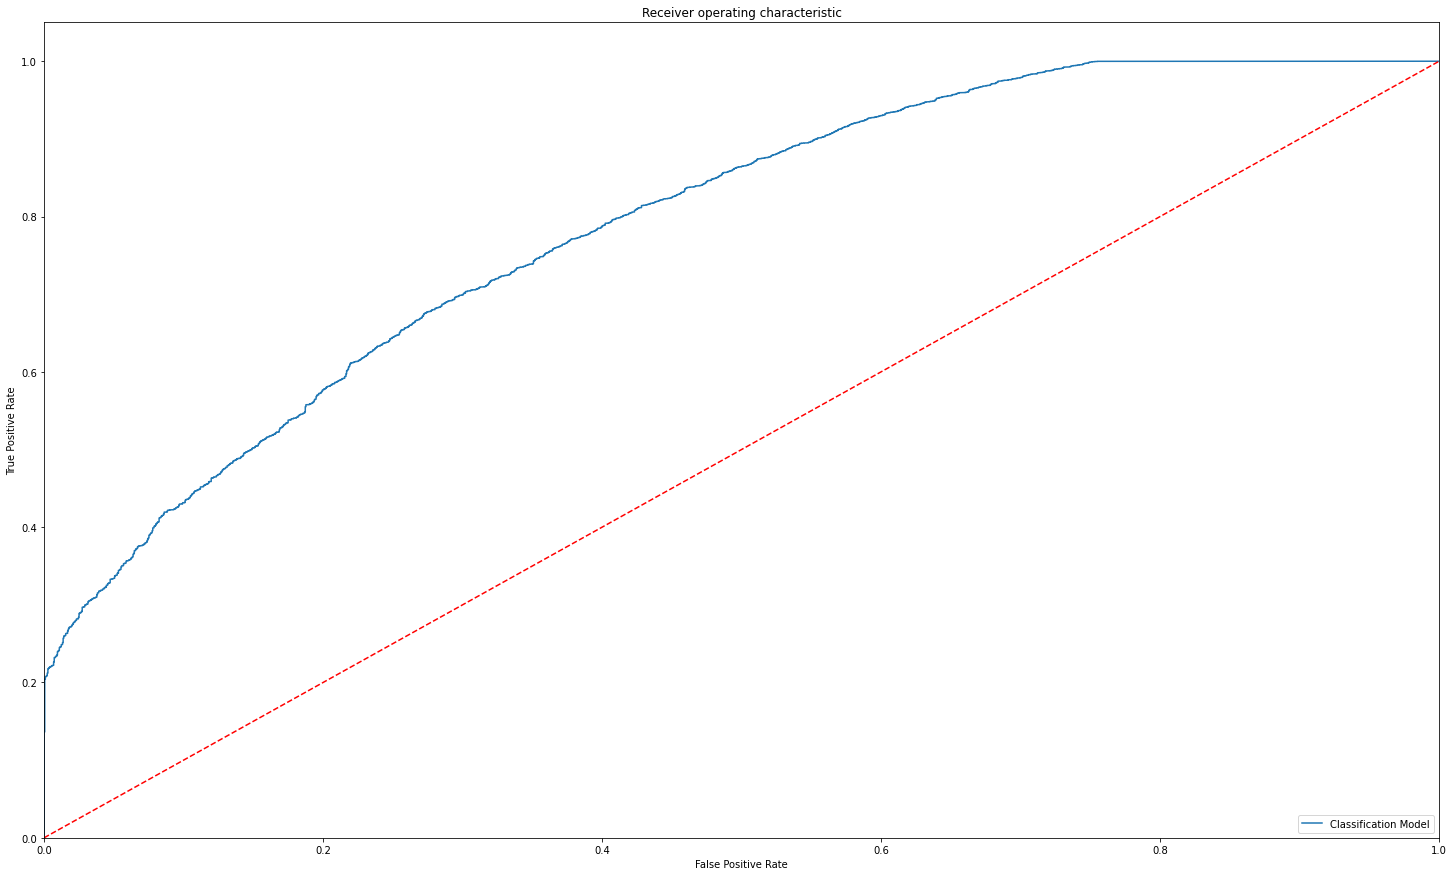

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[7173    9]
 [1653  542]]
Outcome values : 
 7173 9 1653 542
Classification report : 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90      7182
           0       0.98      0.25      0.39      2195

    accuracy                           0.82      9377
   macro avg       0.90      0.62      0.65      9377
weighted avg       0.85      0.82      0.78      9377

Accuracy : 82.3 %
Precision : 81.3 %
Recall : 99.9 %
F1 Score : 0.896
Specificity or True Negative Rate : 24.7 %
Balanced Accuracy : 62.3 %
roc_auc_score: 0.623


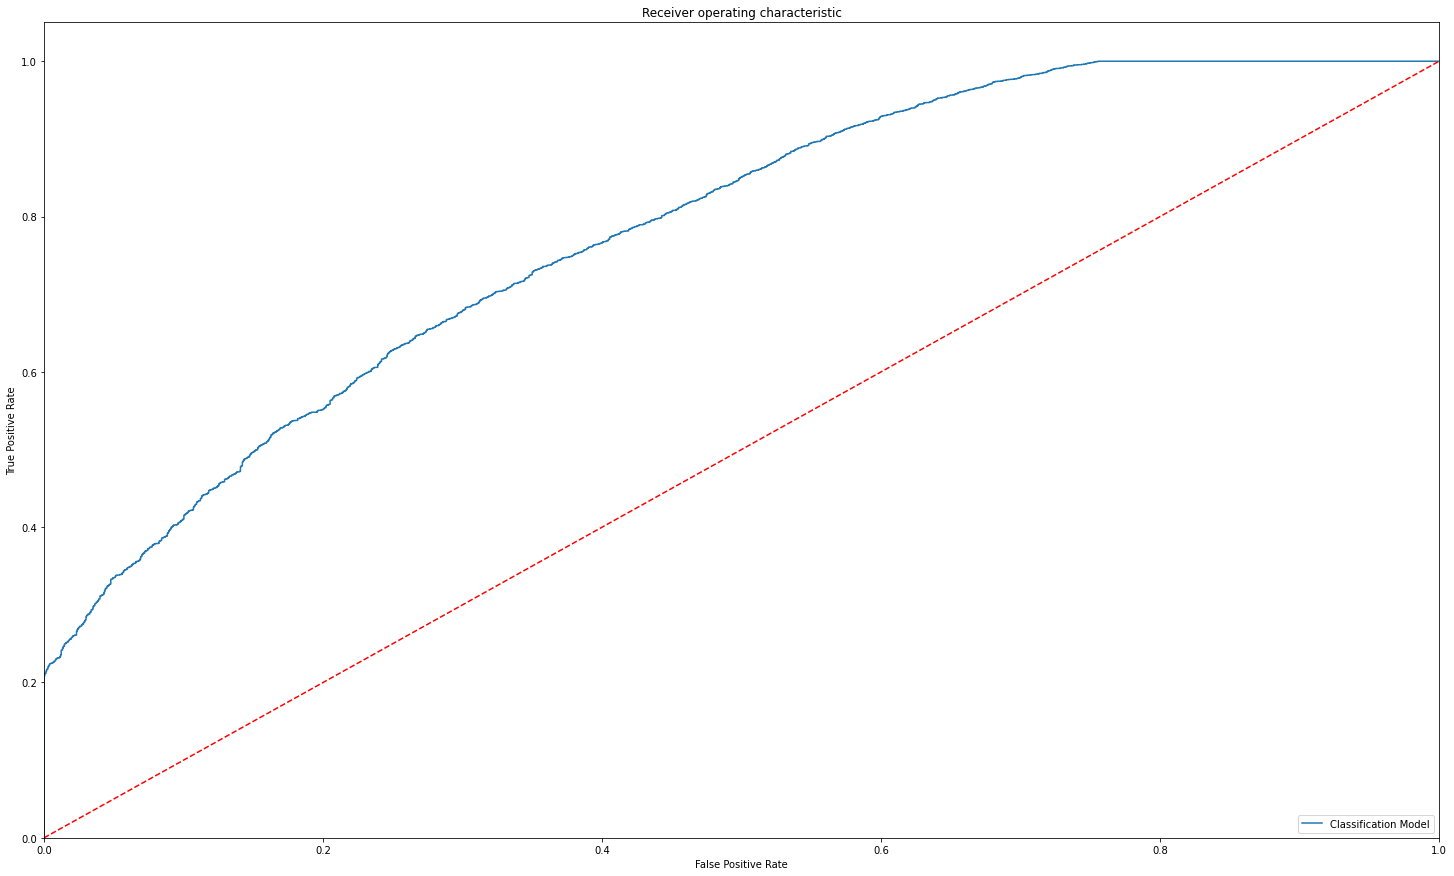

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[3305 3877]
 [ 328 1867]]
Outcome values : 
 3305 3877 328 1867
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.46      0.61      7182
           0       0.33      0.85      0.47      2195

    accuracy                           0.55      9377
   macro avg       0.62      0.66      0.54      9377
weighted avg       0.77      0.55      0.58      9377

Accuracy : 55.2 %
Precision : 91.0 %
Recall : 46.0 %
F1 Score : 0.611
Specificity or True Negative Rate : 85.1 %
Balanced Accuracy : 65.6 %
roc_auc_score: 0.655


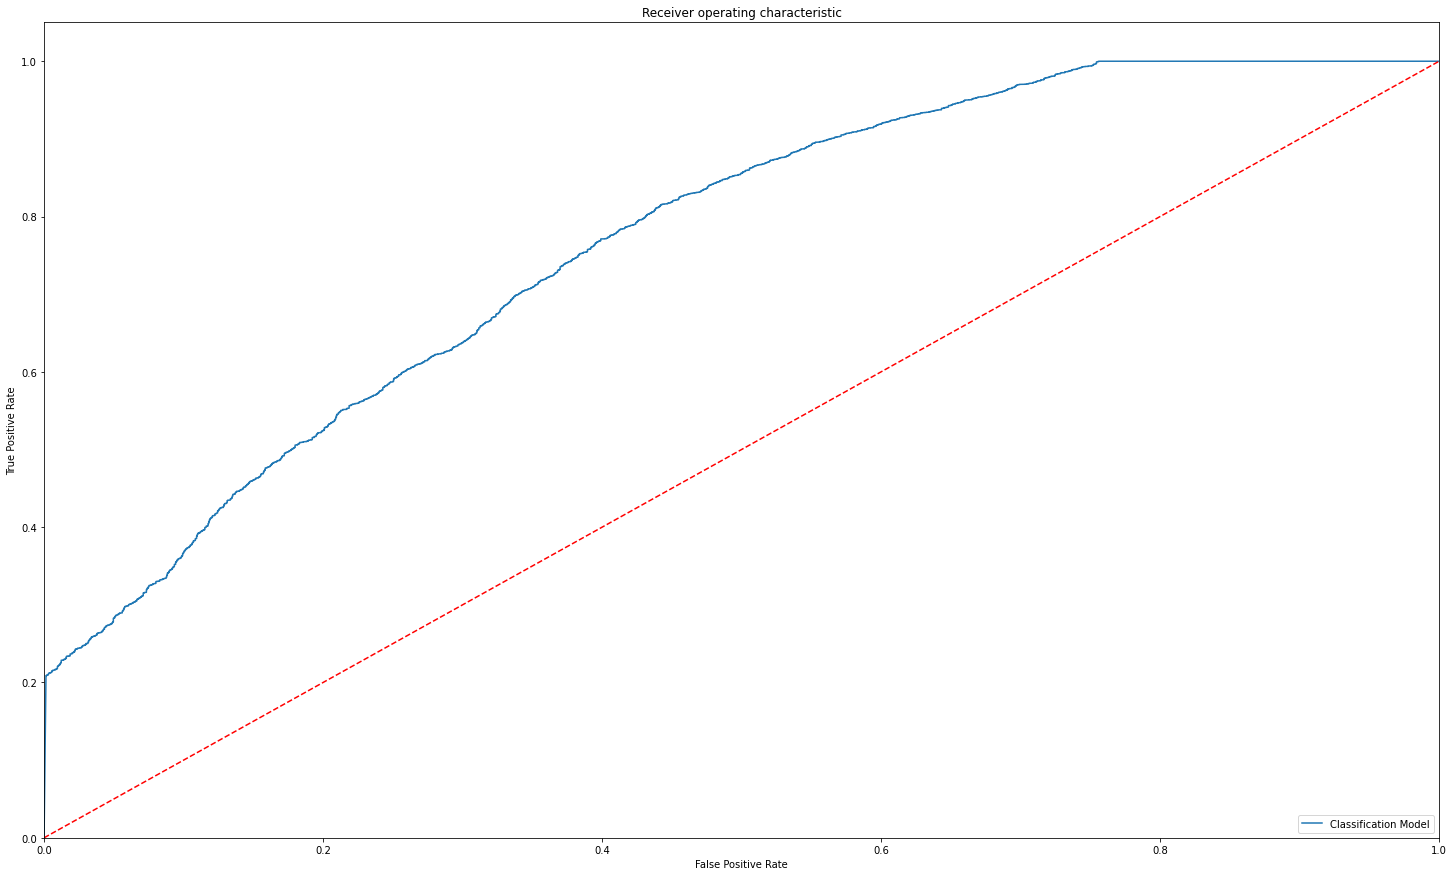

-----------------------------------------------------------------------------------------------------


In [53]:


# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)

In [54]:
EMResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),7181,1,1660,535,0.823,0.812,1.0,0.896,0.244,0.621798,0.622
1,DecisionTreeClassifier(),6007,1175,1232,963,0.743,0.83,0.836,0.833,0.439,0.63756,0.638
2,"(DecisionTreeClassifier(max_features='sqrt', r...",7174,8,1652,543,0.823,0.813,0.999,0.896,0.247,0.623133,0.623
3,"(ExtraTreeClassifier(random_state=2059706300),...",7163,19,1645,550,0.823,0.813,0.997,0.896,0.251,0.623962,0.624
4,KNeighborsClassifier(),6739,443,1481,714,0.795,0.82,0.938,0.875,0.325,0.631801,0.632
5,SVC(probability=True),7182,0,1660,535,0.823,0.812,1.0,0.896,0.244,0.621868,0.622
6,(DecisionTreeClassifier(random_state=461774530...,7146,36,1630,565,0.822,0.814,0.995,0.896,0.257,0.626195,0.626
7,([DecisionTreeRegressor(criterion='friedman_ms...,7179,3,1656,539,0.823,0.813,1.0,0.896,0.246,0.62257,0.623
8,LGBMClassifier(),7173,9,1653,542,0.823,0.813,0.999,0.896,0.247,0.622836,0.623
9,GaussianNB(),3305,3877,328,1867,0.552,0.91,0.46,0.611,0.851,0.655374,0.656


In [36]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
GS_grid = {
    'num_leaves':[20,40,60],
    'min_child_samples':[5,10,15],
    'max_depth':[-1,5,10],
    'learning_rate':[0.05,0.1],
    'reg_alpha':[0,0.01,0.03]
}

# Create object for model

ModelLBG2 = lgb.LGBMClassifier()

# Instantiate the grid search model

Grid_search3 = GridSearchCV(estimator = ModelLBG2, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search3.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [-1, 5, 10],
                         'min_child_samples': [5, 10, 15],
                         'num_leaves': [20, 40, 60],
                         'reg_alpha': [0, 0.01, 0.03]},
             verbose=2)

In [37]:
Grid_search3.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_samples': 10,
 'num_leaves': 20,
 'reg_alpha': 0}

Confusion matrix : 
 [[7178    4]
 [1655  540]]
Outcome values : 
 7178 4 1655 540
Classification report : 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90      7182
           0       0.99      0.25      0.39      2195

    accuracy                           0.82      9377
   macro avg       0.90      0.62      0.65      9377
weighted avg       0.85      0.82      0.78      9377

Accuracy : 82.3 %
Precision : 81.3 %
Recall : 99.9 %
F1 Score : 0.896
Specificity or True Negative Rate : 24.6 %
Balanced Accuracy : 62.2 %
MCC : 0.445
roc_auc_score: 0.623


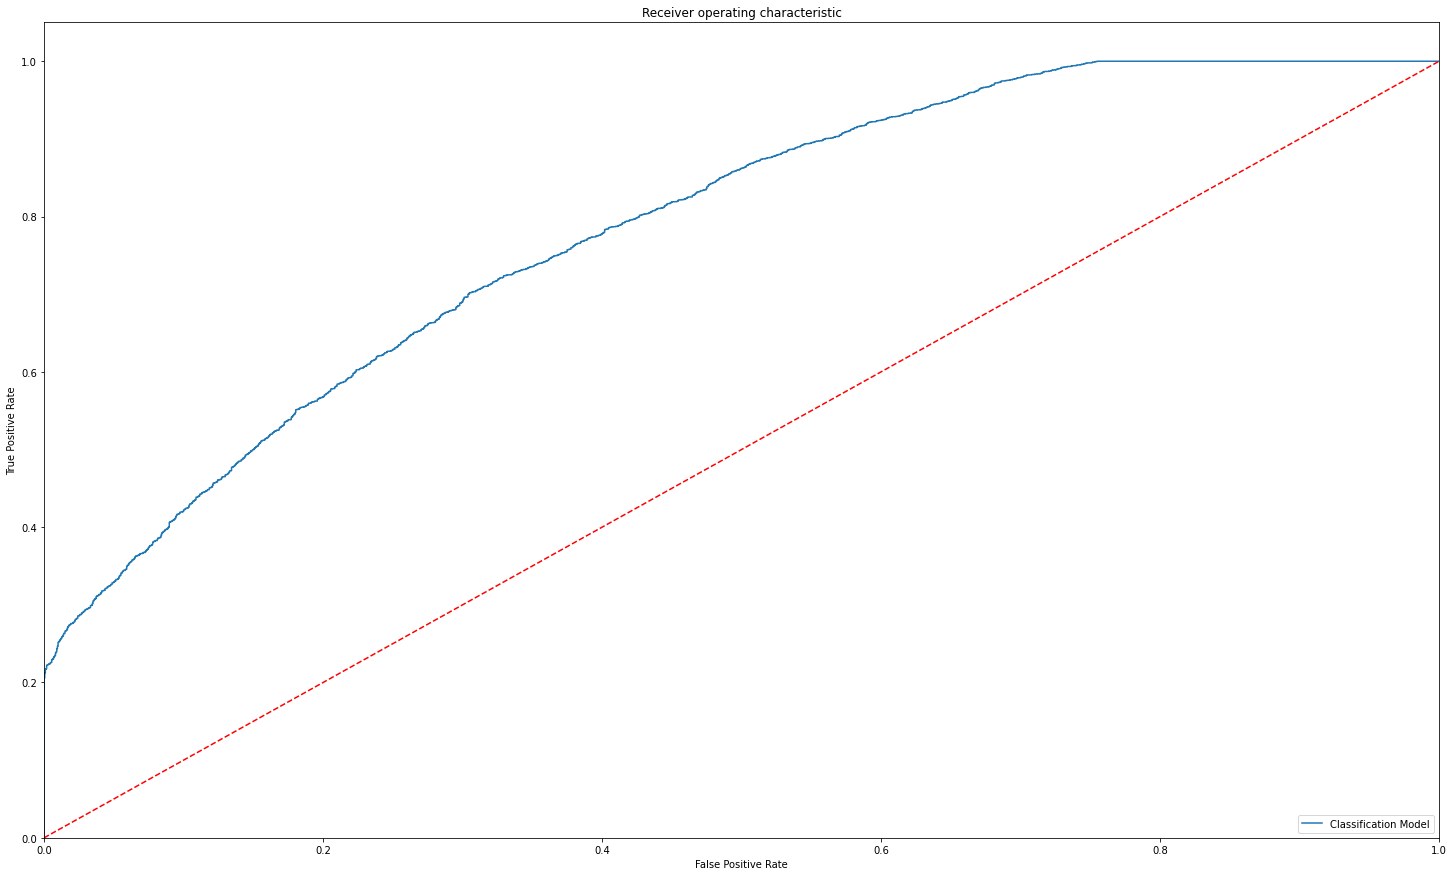

-----------------------------------------------------------------------------------------------------


In [55]:
ModelLGB2 = lgb.LGBMClassifier(learning_rate=0.05,
 max_depth=-1,
 min_child_samples=15,
 num_leaves=40,
 reg_alpha=0.03)

# Train the model with train data 

ModelLGB2.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelLGB2.predict(x_test)
y_pred_prob = ModelLGB2.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLGB2.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelLGB2,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)

In [56]:
EMResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),7181,1,1660,535,0.823,0.812,1.0,0.896,0.244,0.621798,0.622
1,DecisionTreeClassifier(),6007,1175,1232,963,0.743,0.83,0.836,0.833,0.439,0.63756,0.638
2,"(DecisionTreeClassifier(max_features='sqrt', r...",7174,8,1652,543,0.823,0.813,0.999,0.896,0.247,0.623133,0.623
3,"(ExtraTreeClassifier(random_state=2059706300),...",7163,19,1645,550,0.823,0.813,0.997,0.896,0.251,0.623962,0.624
4,KNeighborsClassifier(),6739,443,1481,714,0.795,0.82,0.938,0.875,0.325,0.631801,0.632
5,SVC(probability=True),7182,0,1660,535,0.823,0.812,1.0,0.896,0.244,0.621868,0.622
6,(DecisionTreeClassifier(random_state=461774530...,7146,36,1630,565,0.822,0.814,0.995,0.896,0.257,0.626195,0.626
7,([DecisionTreeRegressor(criterion='friedman_ms...,7179,3,1656,539,0.823,0.813,1.0,0.896,0.246,0.62257,0.623
8,LGBMClassifier(),7173,9,1653,542,0.823,0.813,0.999,0.896,0.247,0.622836,0.623
9,GaussianNB(),3305,3877,328,1867,0.552,0.91,0.46,0.611,0.851,0.655374,0.656


In [40]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of grid search 

GS_grid = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200),
           'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)
           }

# Create object for model

ModelGB1 = GradientBoostingClassifier()

Grid_search = GridSearchCV(estimator = ModelGB1, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_leaf': range(30, 71, 10),
                         'min_samples_split': range(1000, 2100, 200)},
             verbose=2)

In [41]:
Grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 1600}

Confusion matrix : 
 [[7174    8]
 [1652  543]]
Outcome values : 
 7174 8 1652 543
Classification report : 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90      7182
           0       0.99      0.25      0.40      2195

    accuracy                           0.82      9377
   macro avg       0.90      0.62      0.65      9377
weighted avg       0.85      0.82      0.78      9377

Accuracy : 82.3 %
Precision : 81.3 %
Recall : 99.9 %
F1 Score : 0.896
Specificity or True Negative Rate : 24.7 %
Balanced Accuracy : 62.3 %
MCC : 0.443
roc_auc_score: 0.623


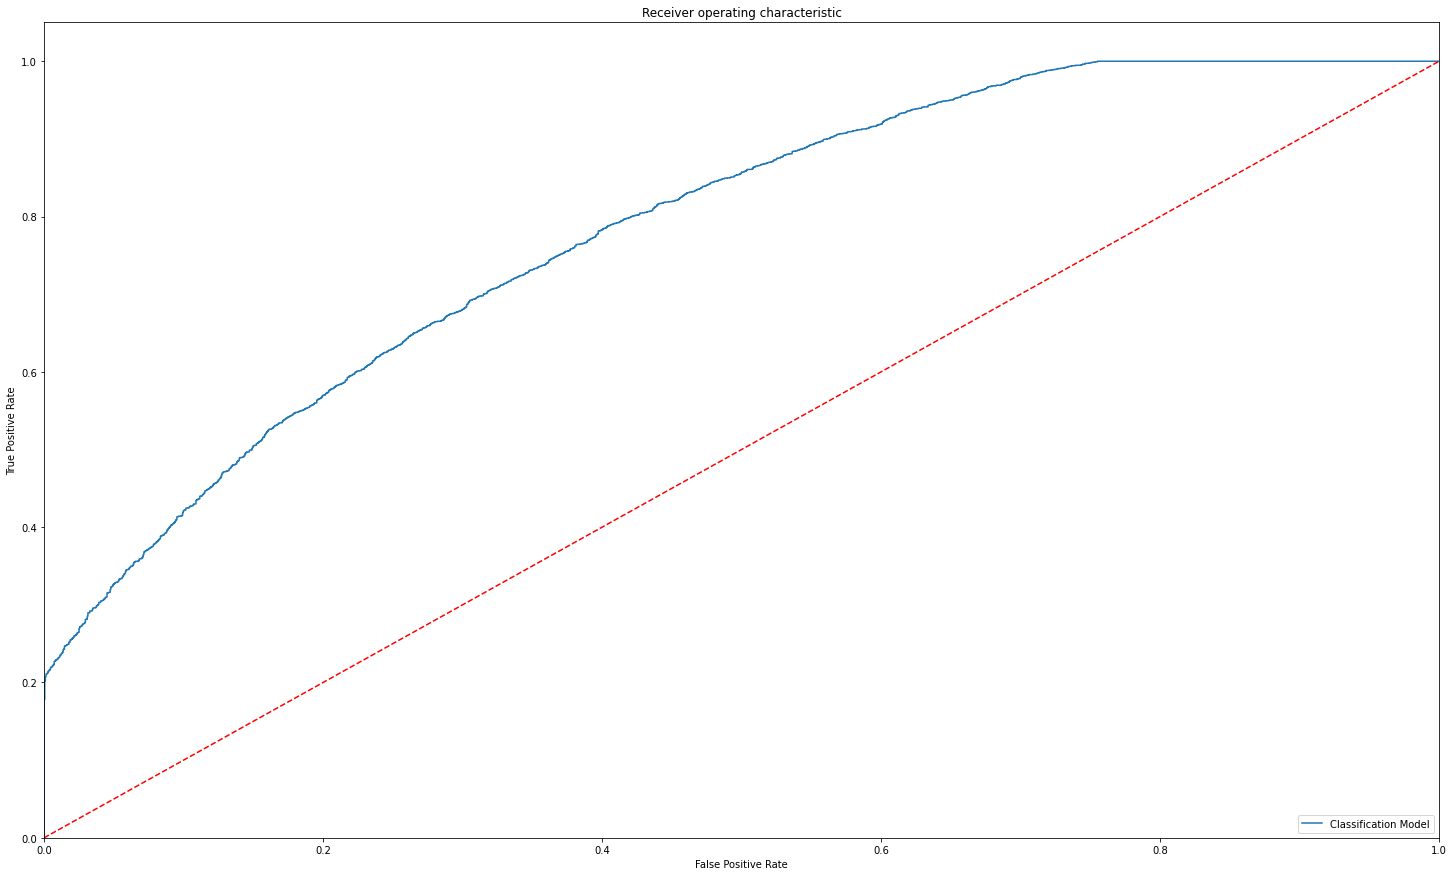

-----------------------------------------------------------------------------------------------------


In [57]:
from sklearn.ensemble import BaggingClassifier

Modelbg2 = GradientBoostingClassifier(max_depth=9, min_samples_leaf=30, min_samples_split=1000)

# Train the model with train data 

Modelbg2.fit(x_train,y_train)

# Predict the model with test data set

y_pred = Modelbg2.predict(x_test)
y_pred_prob = Modelbg2.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, Modelbg2.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : Modelbg2,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)

In [58]:
EMResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),7181,1,1660,535,0.823,0.812,1.0,0.896,0.244,0.621798,0.622
1,DecisionTreeClassifier(),6007,1175,1232,963,0.743,0.83,0.836,0.833,0.439,0.63756,0.638
2,"(DecisionTreeClassifier(max_features='sqrt', r...",7174,8,1652,543,0.823,0.813,0.999,0.896,0.247,0.623133,0.623
3,"(ExtraTreeClassifier(random_state=2059706300),...",7163,19,1645,550,0.823,0.813,0.997,0.896,0.251,0.623962,0.624
4,KNeighborsClassifier(),6739,443,1481,714,0.795,0.82,0.938,0.875,0.325,0.631801,0.632
5,SVC(probability=True),7182,0,1660,535,0.823,0.812,1.0,0.896,0.244,0.621868,0.622
6,(DecisionTreeClassifier(random_state=461774530...,7146,36,1630,565,0.822,0.814,0.995,0.896,0.257,0.626195,0.626
7,([DecisionTreeRegressor(criterion='friedman_ms...,7179,3,1656,539,0.823,0.813,1.0,0.896,0.246,0.62257,0.623
8,LGBMClassifier(),7173,9,1653,542,0.823,0.813,0.999,0.896,0.247,0.622836,0.623
9,GaussianNB(),3305,3877,328,1867,0.552,0.91,0.46,0.611,0.851,0.655374,0.656


In [46]:
# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000, 10)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10, 14]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [47]:
# Create model object

ModelET = ExtraTreesClassifier()

ModelET_randomcv=RandomizedSearchCV(estimator=ModelET, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                                    random_state=100, n_jobs=-1)
### fit the randomized model

ModelET_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [48]:
# best or the optimal values of the parameters for which the model performed the best

ModelET_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'gini'}

Confusion matrix : 
 [[7176    6]
 [1655  540]]
Outcome values : 
 7176 6 1655 540
Classification report : 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90      7182
           0       0.99      0.25      0.39      2195

    accuracy                           0.82      9377
   macro avg       0.90      0.62      0.65      9377
weighted avg       0.85      0.82      0.78      9377

Accuracy : 82.3 %
Precision : 81.3 %
Recall : 99.9 %
F1 Score : 0.896
Specificity or True Negative Rate : 24.6 %
Balanced Accuracy : 62.2 %
MCC : 0.443
roc_auc_score: 0.623


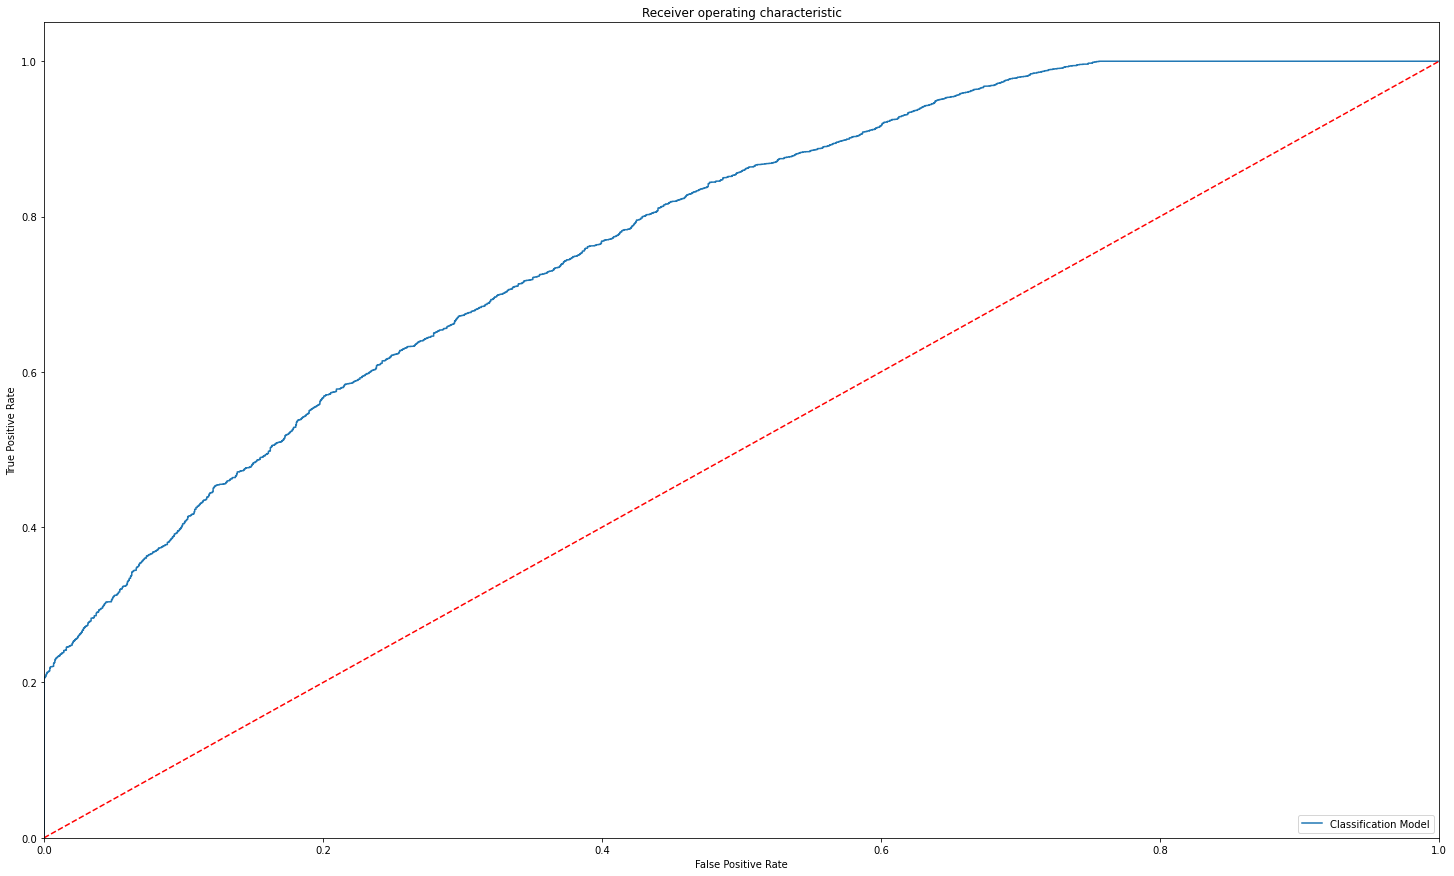

-----------------------------------------------------------------------------------------------------


In [59]:
# To build the 'ExtraTreesClassifier' model with random sampling with Hyperparameter tuning with RandomizedSearchCV

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=200, criterion='entropy', max_depth=450, min_samples_split=14, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [60]:
EMResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),7181,1,1660,535,0.823,0.812,1.0,0.896,0.244,0.621798,0.622
1,DecisionTreeClassifier(),6007,1175,1232,963,0.743,0.83,0.836,0.833,0.439,0.63756,0.638
2,"(DecisionTreeClassifier(max_features='sqrt', r...",7174,8,1652,543,0.823,0.813,0.999,0.896,0.247,0.623133,0.623
3,"(ExtraTreeClassifier(random_state=2059706300),...",7163,19,1645,550,0.823,0.813,0.997,0.896,0.251,0.623962,0.624
4,KNeighborsClassifier(),6739,443,1481,714,0.795,0.82,0.938,0.875,0.325,0.631801,0.632
5,SVC(probability=True),7182,0,1660,535,0.823,0.812,1.0,0.896,0.244,0.621868,0.622
6,(DecisionTreeClassifier(random_state=461774530...,7146,36,1630,565,0.822,0.814,0.995,0.896,0.257,0.626195,0.626
7,([DecisionTreeRegressor(criterion='friedman_ms...,7179,3,1656,539,0.823,0.813,1.0,0.896,0.246,0.62257,0.623
8,LGBMClassifier(),7173,9,1653,542,0.823,0.813,0.999,0.896,0.247,0.622836,0.623
9,GaussianNB(),3305,3877,328,1867,0.552,0.91,0.46,0.611,0.851,0.655374,0.656
